In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Service Record-Grid view (1).csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2337 non-null   int64  
 1   Registration Number                                       2335 non-null   object 
 2   Delivery Date (from Registration Number)                  2335 non-null   object 
 3   Current Vehicle Age in Months                             2335 non-null   float64
 4   Model                                                     2335 non-null   object 
 5   Hub                                                       2335 non-null   object 
 6   Date Sent                                                 2289 non-null   object 
 7   Date Received                                             2265 non-null   object 
 8   Received Month/Yea

In [13]:
data['Registration Number'].isnull().sum()

2

In [14]:
data.isnull().sum()

SL No.                                                         0
Registration Number                                            2
Delivery Date (from Registration Number)                       2
Current Vehicle Age in Months                                  2
Model                                                          2
Hub                                                            2
Date Sent                                                     48
Date Received                                                 72
Received Month/Year                                            0
Vehicle Age At Service Time                                   49
Downtime                                                      84
Service Vendors                                               47
Service Type                                                   2
Other's Data                                                1428
Approval Status                                                0
Invoice Number           

In [15]:
data['Registration Number'].nunique()

613

503 unique cars of the 876 records.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2337 non-null   int64  
 1   Registration Number                                       2335 non-null   object 
 2   Delivery Date (from Registration Number)                  2335 non-null   object 
 3   Current Vehicle Age in Months                             2335 non-null   float64
 4   Model                                                     2335 non-null   object 
 5   Hub                                                       2335 non-null   object 
 6   Date Sent                                                 2289 non-null   object 
 7   Date Received                                             2265 non-null   object 
 8   Received Month/Yea

In [17]:
data['Registration Number'].value_counts()

Registration Number
WB07K0523    15
WB07K0314    13
WB07K0348    12
WB07K1477    12
WB07K1200    12
             ..
WB07K1214     1
WB04J2516     1
WB04J2523     1
WB05A0895     1
WB04J4182     1
Name: count, Length: 613, dtype: int64

In [18]:
data[data["Registration Number"]=='WB07K0523']['Service Type']

188                 Other
198                 Other
296                 Other
458                L Mode
645                 Other
841                 Other
963     AC Charging Issue
987     AC Charging Issue
1210                Other
1588    DC Charging Issue
1627                Other
1800                Other
1923               L Mode
2020    Overheating Issue
2172               L Mode
Name: Service Type, dtype: object

In [19]:
multiple_repairs=data[data['Registration Number'].value_counts()>=3]

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/2134468728.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  multiple_repairs=data[data['Registration Number'].value_counts()>=3]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [20]:
multiple_repairs_reg = data['Registration Number'].value_counts()[data['Registration Number'].value_counts() >= 3].index

multiple_repairs = data[data['Registration Number'].isin(multiple_repairs_reg)]


In [21]:
multiple_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 0 to 2336
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2029 non-null   int64  
 1   Registration Number                                       2029 non-null   object 
 2   Delivery Date (from Registration Number)                  2029 non-null   object 
 3   Current Vehicle Age in Months                             2029 non-null   float64
 4   Model                                                     2029 non-null   object 
 5   Hub                                                       2029 non-null   object 
 6   Date Sent                                                 1988 non-null   object 
 7   Date Received                                             1967 non-null   object 
 8   Received Month/Year    

In [22]:
multiple_repairs['Registration Number'].value_counts()

Registration Number
WB07K0523    15
WB07K0314    13
WB07K1200    12
WB07K0348    12
WB07K1477    12
             ..
WB05A0865     3
WB07K0308     3
WB07K1245     3
WB07K1468     3
WB04J2566     3
Name: count, Length: 388, dtype: int64

In [23]:
multiple_repairs['Service Type'].value_counts()

Service Type
Other                    837
Air Conditioner Issue    493
L Mode                   172
Periodic Service         152
Overheating Issue        129
DC Charging Issue         84
Third Free Service        52
Second Free Service       43
AC Charging Issue         40
First Free Service        26
Name: count, dtype: int64

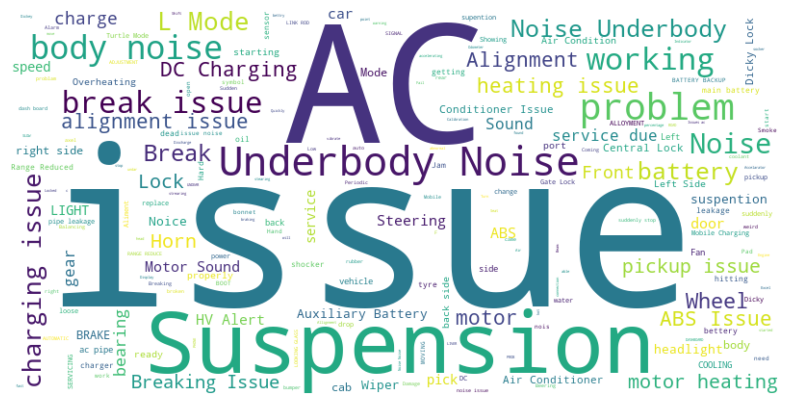

In [24]:
from wordcloud import WordCloud

text = " ".join(multiple_repairs["Other's Data"].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

underbody noise. AC. Battery. L Mode

In [25]:
multiple_repairs['issues']=multiple_repairs['Service Type']

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/1465148079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['issues']=multiple_repairs['Service Type']


In [26]:
multiple_repairs['issues'].value_counts()

issues
Other                    837
Air Conditioner Issue    493
L Mode                   172
Periodic Service         152
Overheating Issue        129
DC Charging Issue         84
Third Free Service        52
Second Free Service       43
AC Charging Issue         40
First Free Service        26
Name: count, dtype: int64

In [27]:
multiple_repairs['Other\'s Data'] = multiple_repairs['Other\'s Data'].str.lower()

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/4150520204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Other\'s Data'] = multiple_repairs['Other\'s Data'].str.lower()


In [28]:
'''def mark_issues(text):
    issues = []
    if "underbody" in text.lower():
        issues.append("underbody")
    if "ac" in text.lower() or "air conditioner" in text.lower():
        issues.append("ac")
    if "battery" in text.lower():
        issues.append("battery")
    if "l mode" in text.lower():
        issues.append("l mode")
    return ", ".join(issues)

multiple_repairs["issues"] = multiple_repairs[(multiple_repairs['Service Type'] == 'Other')]['Other\'s Data'].apply(mark_issues)'''

'def mark_issues(text):\n    issues = []\n    if "underbody" in text.lower():\n        issues.append("underbody")\n    if "ac" in text.lower() or "air conditioner" in text.lower():\n        issues.append("ac")\n    if "battery" in text.lower():\n        issues.append("battery")\n    if "l mode" in text.lower():\n        issues.append("l mode")\n    return ", ".join(issues)\n\nmultiple_repairs["issues"] = multiple_repairs[(multiple_repairs[\'Service Type\'] == \'Other\')][\'Other\'s Data\'].apply(mark_issues)'

In [29]:
multiple_repairs['issues']

0       Air Conditioner Issue
1       Air Conditioner Issue
2            Periodic Service
3                      L Mode
4       Air Conditioner Issue
                ...          
2331    Air Conditioner Issue
2332    Air Conditioner Issue
2333    Air Conditioner Issue
2335                    Other
2336    Air Conditioner Issue
Name: issues, Length: 2029, dtype: object

In [30]:
multiple_repairs['issues'].value_counts()

issues
Other                    837
Air Conditioner Issue    493
L Mode                   172
Periodic Service         152
Overheating Issue        129
DC Charging Issue         84
Third Free Service        52
Second Free Service       43
AC Charging Issue         40
First Free Service        26
Name: count, dtype: int64

In [31]:
multiple_repairs['Other\'s Data']=multiple_repairs['Other\'s Data'].str.lower()

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/3480773229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Other\'s Data']=multiple_repairs['Other\'s Data'].str.lower()


In [32]:
multiple_repairs['Other\'s Data']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
2331                 NaN
2332                 NaN
2333                 NaN
2335    suspension issue
2336                 NaN
Name: Other's Data, Length: 2029, dtype: object

In [33]:
multiple_repairs['Other\'s Data'].value_counts()

Other's Data
underbody noise                              54
under body noise                             31
abs issue                                    19
alignment issue                              14
suspension noise                             14
                                             ..
suddenly stop accelerating stop the cab..     1
dicky lock issue and l mode                   1
redeyter fan noise                            1
redeyeter noise issue                         1
suspension noise.                             1
Name: count, Length: 599, dtype: int64

In [34]:
import pandas as pd

def mark_issues(text):
    issues = []
    
    if pd.notnull(text) and isinstance(text, str):
        text_lower = text.lower()
        
        if "underbody" in text_lower or "noise" in text_lower:
            issues.append("UB Noise")
        
        if "ac" in text_lower or "air conditioner" in text_lower:
            issues.append("Air Conditioner Issue")
        
        if "battery" in text_lower:
            issues.append("Battery Issue")
        
        if "mode" in text_lower:
            issues.append("L Mode")
    
    return ", ".join(issues)

In [35]:
multiple_repairs["issues"] = multiple_repairs["Other's Data"].apply(mark_issues)

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/1876382294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs["issues"] = multiple_repairs["Other's Data"].apply(mark_issues)


In [36]:
multiple_repairs['issues'].value_counts()

issues
                                                1549
UB Noise                                         234
Air Conditioner Issue                            113
UB Noise, Air Conditioner Issue                   35
Battery Issue                                     34
L Mode                                            29
Air Conditioner Issue, L Mode                      7
Air Conditioner Issue, Battery Issue               7
UB Noise, Battery Issue                            6
Battery Issue, L Mode                              6
UB Noise, L Mode                                   6
UB Noise, Air Conditioner Issue, L Mode            2
Air Conditioner Issue, Battery Issue, L Mode       1
Name: count, dtype: int64

In [37]:
multiple_repairs[multiple_repairs['issues']=='Air Conditioner Issue, Battery Issue']

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,issues
755,756,WB07K1184,17/3/2023,14.0,Xpres-T Electra,HIDCO,4/11/2023,4/11/2023,11/2023,232.0,...,subhajit basak,18/12/2023 1:05pm,"dsubho49@gmail.com,atanudey181@gmail.com,anirb...",NaN,11/2023,NaN,NaN,Running,recyPHCebpRBsmSPJ,"Air Conditioner Issue, Battery Issue"
761,762,WB07K0550,2/10/2022,19.0,Xpres-T Electra,Khiderpore,7/12/2023,7/12/2023,12/2023,431.0,...,subhajit basak,7/12/2023 5:08pm,"gangulysagar67@gmail.com,sagardas1707@gmail.co...",NaN,12/2023,NaN,NaN,Running,recwLt55GfwUrkRZO,"Air Conditioner Issue, Battery Issue"
900,901,WB07K0640,7/12/2022,17.0,Xpres-T Ziptron,O2,5/1/2024,5/1/2024,01/2024,394.0,...,subhajit basak,25/1/2024 6:33pm,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,01/2024,NaN,NaN,Running,rec5uWB0Dans1MPiX,"Air Conditioner Issue, Battery Issue"
1569,1584,WB07K1826,20/10/2023,7.0,Xpres-T Ziptron,EVRE,28/3/2024,28/3/2024,03/2024,160.0,...,subhajit basak,15/5/2024 7:05pm,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,03/2024,WIP.,15100.0,Running,rec2PlGZNqprrCrHi,"Air Conditioner Issue, Battery Issue"
1971,2025,WB07K0293,25/7/2022,21.0,Xpres-T Electra,HIDCO,29/4/2024,2/5/2024,05/2024,644.0,...,subhajit basak,2/5/2024 4:49pm,"dsubho49@gmail.com,atanudey181@gmail.com,anirb...",NaN,04/2024,WIP deep da. auxillary battery. Today,NaN,Running,recJdpwjwmYMvfAvV,"Air Conditioner Issue, Battery Issue"
2021,2077,WB05A0205,31/1/2023,15.0,Xpres-T Electra,Khiderpore,NaN,NaN,#ERROR!,NaN,...,subhajit basak,3/5/2024 9:09am,"gangulysagar67@gmail.com,sagardas1707@gmail.co...",Send tomorrow,#ERROR!,NaN,NaN,Running,rec3OKOvYjiDh2F8U,"Air Conditioner Issue, Battery Issue"
2041,2097,WB05A0205,31/1/2023,15.0,Xpres-T Electra,Khiderpore,4/5/2024,6/5/2024,05/2024,459.0,...,Saikat Nag,6/5/2024 3:13pm,"gangulysagar67@gmail.com,sagardas1707@gmail.co...",NaN,05/2024,WIP,NaN,Running,rec5RHbv7le99qzK1,"Air Conditioner Issue, Battery Issue"


In [38]:
multiple_repairs[multiple_repairs['Record ID']=='recJdpwjwmYMvfAvV']['Other\'s Data']

1971    main battery backup issue
Name: Other's Data, dtype: object

In [39]:
multiple_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2029 non-null   int64  
 1   Registration Number                                       2029 non-null   object 
 2   Delivery Date (from Registration Number)                  2029 non-null   object 
 3   Current Vehicle Age in Months                             2029 non-null   float64
 4   Model                                                     2029 non-null   object 
 5   Hub                                                       2029 non-null   object 
 6   Date Sent                                                 1988 non-null   object 
 7   Date Received                                             1967 non-null   object 
 8   Received Month/Year    

In [40]:
multiple_repairs.drop(['issues'],axis=1,inplace=True)

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_91780/2802635520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs.drop(['issues'],axis=1,inplace=True)


In [41]:
multiple_repairs.describe()

,SL No.,Current Vehicle Age in Months,Vehicle Age At Service Time,Downtime,Service KM Reading
count,2029.000000,2029.000000,1988.000000,1957.000000,726.000000
mean,1123.623460,14.451947,322.680584,-678.825243,47347.564738
std,687.317915,4.502386,149.402750,21268.613832,20917.897663
min,1.000000,5.000000,7.000000,-665472.000000,4010.000000
25%,525.000000,11.000000,200.000000,0.000000,30465.750000
50%,1089.000000,14.000000,328.000000,0.000000,47264.500000
75%,1714.000000,19.000000,426.000000,1.000000,61494.500000
max,2398.000000,22.000000,665.000000,107.000000,91396.000000


In [42]:
multiple_repairs['Registration Number'].value_counts()

Registration Number
WB07K0523    15
WB07K0314    13
WB07K1200    12
WB07K0348    12
WB07K1477    12
             ..
WB05A0865     3
WB07K0308     3
WB07K1245     3
WB07K1468     3
WB04J2566     3
Name: count, Length: 388, dtype: int64

In [43]:
multiple_repairs_filtered=multiple_repairs[['Registration Number','Date Sent','Downtime','Service Type','Other\'s Data','Invoice Number','Record ID']]

In [44]:
multiple_repairs_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 0 to 2336
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Registration Number  2029 non-null   object 
 1   Date Sent            1988 non-null   object 
 2   Downtime             1957 non-null   float64
 3   Service Type         2028 non-null   object 
 4   Other's Data         835 non-null    object 
 5   Invoice Number       1405 non-null   object 
 6   Record ID            2029 non-null   object 
dtypes: float64(1), object(6)
memory usage: 126.8+ KB


In [45]:
print(336/97)

3.463917525773196


In [46]:
multiple_repairs_filtered['Date Sent']

0       21/7/2023
1       20/7/2023
2       21/7/2023
3       20/7/2023
4       21/7/2023
          ...    
2331    24/5/2024
2332          NaN
2333    24/5/2024
2335    24/5/2024
2336          NaN
Name: Date Sent, Length: 2029, dtype: object

In [47]:

multiple_repairs_filtered['Date Sent'] = pd.to_datetime(multiple_repairs_filtered['Date Sent'], format='%d-%m-%Y')

# Create a new column for the month
multiple_repairs_filtered['Month'] = multiple_repairs_filtered['Date Sent'].dt.month

ValueError: time data "21/7/2023" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
multiple_repairs_filtered['Month']

1      3
2      3
7      3
9      3
10     3
      ..
857    5
858    5
865    5
871    5
874    5
Name: Month, Length: 336, dtype: int32

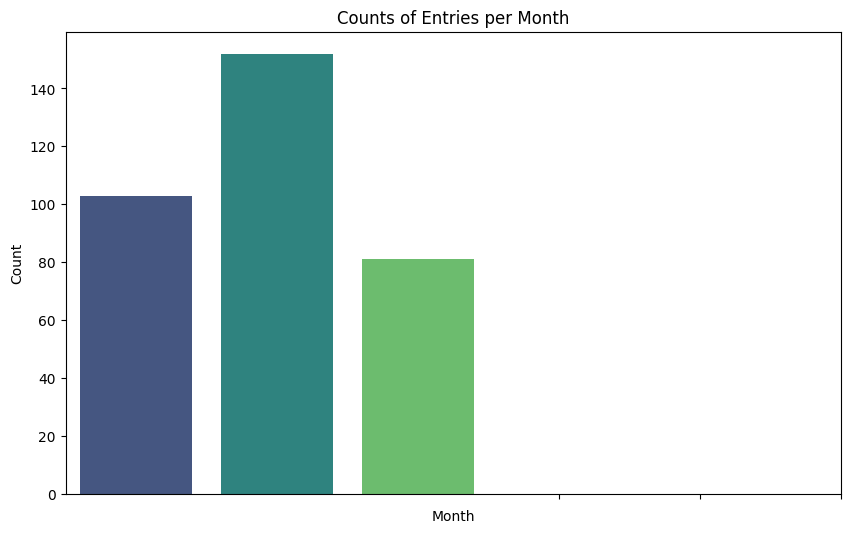

In [ ]:
import seaborn as sns
month_counts = multiple_repairs_filtered['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

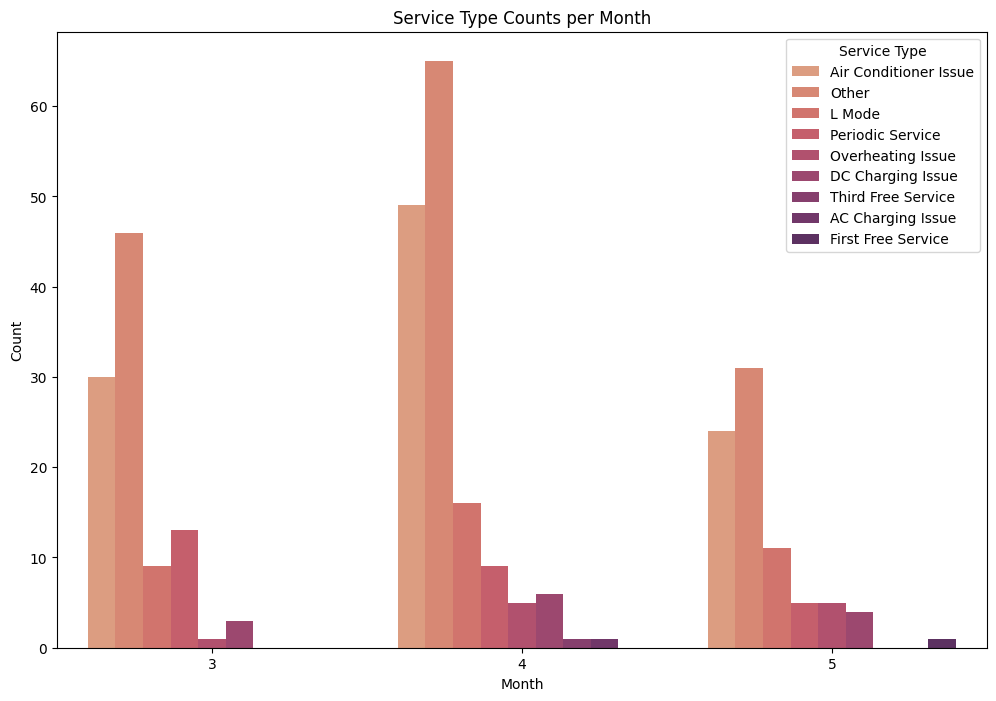

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=multiple_repairs_filtered, x='Month', hue='Service Type', palette='flare')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Service Type Counts per Month')
plt.legend(title='Service Type')
plt.show()

In [ ]:
month_counts = multiple_repairs_filtered['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

In [ ]:
multiple_repairs_filtered[multiple_repairs_filtered['Registration Number']=='WB05A0897']

,Registration Number,Date Sent,Downtime,Service Type,Other's Data,Invoice Number,Record ID,Month
115,WB05A0897,2024-03-14,1.0,Other,turtle mode,EDLCOL2324002294,recmrWzgrhQs7WIsq,3
182,WB05A0897,2024-03-22,0.0,Periodic Service,NaN,ETCPHR2324003608,recYSrQys8XQXSKPi,3
446,WB05A0897,2024-04-16,0.0,Air Conditioner Issue,NaN,NaN,recAci0t7UwYd8Ul9,4
664,WB05A0897,2024-05-03,NaN,Air Conditioner Issue,NaN,NaN,recFj3AIAcHYb549c,5
699,WB05A0897,2024-05-07,0.0,Periodic Service,NaN,NaN,rec8V4osvzXz6xSBV,5
817,WB05A0897,2024-05-15,0.0,Overheating Issue,NaN,NaN,recjkpdutQU46ftz8,5


In [ ]:
multiple_repairs_filtered[multiple_repairs_filtered['Registration Number']=='WB05A0897']

,Registration Number,Date Sent,Downtime,Service Type,Other's Data,Invoice Number,Record ID,Month
115,WB05A0897,2024-03-14,1.0,Other,turtle mode,EDLCOL2324002294,recmrWzgrhQs7WIsq,3
182,WB05A0897,2024-03-22,0.0,Periodic Service,NaN,ETCPHR2324003608,recYSrQys8XQXSKPi,3
446,WB05A0897,2024-04-16,0.0,Air Conditioner Issue,NaN,NaN,recAci0t7UwYd8Ul9,4
664,WB05A0897,2024-05-03,NaN,Air Conditioner Issue,NaN,NaN,recFj3AIAcHYb549c,5
699,WB05A0897,2024-05-07,0.0,Periodic Service,NaN,NaN,rec8V4osvzXz6xSBV,5
817,WB05A0897,2024-05-15,0.0,Overheating Issue,NaN,NaN,recjkpdutQU46ftz8,5


In [ ]:
multiple_repairs.groupby('Registration Number').sum('Invoice Amount')

,SL No.,Current Vehicle Age in Months,Vehicle Age At Service Time,Downtime,Service KM Reading
Registration Number,,,,,
WB04J0909,2389,70,2054,4.0,189041.0
WB04J0915,1589,56,1608,6.0,256936.0
WB04J0935,2458,56,1678,0.0,187010.0
WB04J0946,1118,42,1192,9.0,39622.0
WB04J0957,1020,70,1910,27.0,0.0
...,...,...,...,...,...
WB07K1464,1383,33,918,14.0,150775.0
WB07K1472,1705,33,936,1.0,144618.0
WB07K1476,1664,33,974,3.0,144941.0


In [ ]:
grouped_repairs = multiple_repairs.groupby('Registration Number')['Invoice Amount'].sum()

#top_5_cars = grouped_repairs.sort_values(ascending=False).head(5)
#print(top_5_cars)

In [ ]:
grouped_repairs

Registration Number
WB04J0909                   ₹ 738.00₹ 92.00₹ 11,181.00
WB04J0915    ₹ 1,050.00₹ 5,702.00₹ 10,790.00₹ 1,716.00
WB04J0935                 ₹ 1,050.00₹ 2,848.00₹ 719.00
WB04J0946                         ₹ 1,153.00₹ 1,283.00
WB04J0957                                            0
                               ...                    
WB07K1464              ₹ 8,203.00₹ 1,050.00₹ 14,739.00
WB07K1472              ₹ 3,723.00₹ 3,436.00₹ 11,652.00
WB07K1476                ₹ 453.00₹ 5,000.00₹ 16,897.00
WB07K1477                        ₹ 9,246.00₹ 10,431.00
WB07K1499                ₹ 3,113.00₹ 382.00₹ 31,841.00
Name: Invoice Amount, Length: 97, dtype: object

In [ ]:
def classify_issues(text):
    if not isinstance(text, str):
        return "Unknown"
    text = text.lower()
    issues = []
    if 'underbody' in text or 'under body' in text:
        issues.append("Underbody Noise")
    if 'ac' in text or 'air conditioner' in text:
        issues.append("Air Conditioner Issue")
    if 'l mode' in text or 'lmode' in text:
        issues.append("L Mode")
    return ", ".join(issues) if issues else "Unknown"

# Apply the function to the 'Other\'s Data' column
multiple_repairs['Classified Issues'] = multiple_repairs['Other\'s Data'].apply(classify_issues)

# Print the resulting DataFrame
print(multiple_repairs)

     SL No. Registration Number Delivery Date (from Registration Number)  \
1         2           WB07K0581                               17-11-2022   
2         3           WB07K0520                               29-09-2022   
7         8           WB07K0301                               20-08-2022   
9        10           WB07K0566                               29-11-2022   
10       11           WB07K1044                               27-01-2023   
..      ...                 ...                                      ...   
857     858           WB07K0455                               29-09-2022   
858     859           WB05A0287                               10-02-2023   
865     866           WB05A1899                               26-10-2023   
871     872           WB07K0276                               25-07-2022   
874     875           WB05A0235                               31-01-2023   

     Current Vehicle Age in Months            Model         Hub   Date Sent  \
1       

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_31420/368742381.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Classified Issues'] = multiple_repairs['Other\'s Data'].apply(classify_issues)


In [ ]:
multiple_repairs['Classified Issues'].value_counts()

Classified Issues
Unknown                                           273
Air Conditioner Issue                              27
Underbody Noise                                    19
L Mode                                             11
Air Conditioner Issue, L Mode                       3
Underbody Noise, Air Conditioner Issue              2
Underbody Noise, Air Conditioner Issue, L Mode      1
Name: count, dtype: int64

In [ ]:
multiple_repairs['Service Type']

1      Air Conditioner Issue
2      Air Conditioner Issue
7                      Other
9      Air Conditioner Issue
10                     Other
               ...          
857                   L Mode
858                    Other
865                    Other
871    Air Conditioner Issue
874        Overheating Issue
Name: Service Type, Length: 336, dtype: object

In [ ]:
def classify_issues(text):
    if not isinstance(text, str):
        return "Unknown"
    text = text.lower()
    issues = []
    if 'underbody' in text or 'under body' in text:
        issues.append("Underbody Noise")
    if 'ac' in text or 'air conditioner' in text:
        issues.append("Air Conditioner Issue")
    if 'l mode' in text or 'lmode' in text:
        issues.append("L Mode")
    return ", ".join(issues) if issues else "Unknown"

# Apply the function to the 'Other\'s Data' column
multiple_repairs['Classified Issues'] = multiple_repairs['Other\'s Data'].apply(classify_issues)

# Merge columns by replacing 'Others' in 'Service Type' with values from 'Classified Issues'
multiple_repairs['Merged Service Type'] = multiple_repairs.apply(
    lambda row: row['Classified Issues'] if row['Service Type'] == 'Others' else row['Service Type'],
    axis=1
)

# Print the resulting DataFrame
print(multiple_repairs[['Other\'s Data', 'Service Type', 'Classified Issues', 'Merged Service Type']])

                                          Other's Data           Service Type  \
1                                                  NaN  Air Conditioner Issue   
2                                                  NaN  Air Conditioner Issue   
7                                underbody & alignment                  Other   
9                                                  NaN  Air Conditioner Issue   
10                     suspension issue and ac problem                  Other   
..                                                 ...                    ...   
857                                                NaN                 L Mode   
858  ac and fan not working / central lock not working                  Other   
865                                   suspention noise                  Other   
871                                                NaN  Air Conditioner Issue   
874                                                NaN      Overheating Issue   

         Classified Issues 

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_31420/2338819591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Classified Issues'] = multiple_repairs['Other\'s Data'].apply(classify_issues)
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_31420/2338819591.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Merged Service Type'] = multiple_repairs.apply(


In [ ]:
multiple_repairs['Merged Service Type'].value_counts()

Merged Service Type
Other                    142
Air Conditioner Issue    103
L Mode                    36
Periodic Service          27
DC Charging Issue         13
Overheating Issue         11
Third Free Service         1
AC Charging Issue          1
First Free Service         1
Name: count, dtype: int64

In [ ]:
multiple_repairs['Service Type'].value_counts()

Service Type
Other                    142
Air Conditioner Issue    103
L Mode                    36
Periodic Service          27
DC Charging Issue         13
Overheating Issue         11
Third Free Service         1
AC Charging Issue          1
First Free Service         1
Name: count, dtype: int64

In [ ]:
multiple_repairs['Merged Service Type'] = multiple_repairs.apply(
    lambda row: row['Classified Issues'] if row['Service Type'] == 'Other' else row['Service Type'],
    axis=1
)


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_31420/4284463472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_repairs['Merged Service Type'] = multiple_repairs.apply(


In [ ]:
multiple_repairs['Merged Service Type'].value_counts()

Merged Service Type
Air Conditioner Issue                             130
Unknown                                            79
L Mode                                             47
Periodic Service                                   27
Underbody Noise                                    19
DC Charging Issue                                  13
Overheating Issue                                  11
Air Conditioner Issue, L Mode                       3
Underbody Noise, Air Conditioner Issue              2
Underbody Noise, Air Conditioner Issue, L Mode      1
Third Free Service                                  1
AC Charging Issue                                   1
First Free Service                                  1
Name: count, dtype: int64

Dictionary for every car's serivce reasonand the count.

In [ ]:
multiple_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1 to 874
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    336 non-null    int64  
 1   Registration Number                                       336 non-null    object 
 2   Delivery Date (from Registration Number)                  336 non-null    object 
 3   Current Vehicle Age in Months                             336 non-null    int64  
 4   Model                                                     336 non-null    object 
 5   Hub                                                       336 non-null    object 
 6   Date Sent                                                 336 non-null    object 
 7   Date Received                                             316 non-null    object 
 8   Received Month/Year      

In [ ]:
issue_counts = multiple_repairs.pivot_table(index='Registration Number', columns='Merged Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

for reg_num, issues in issue_counts_dict.items():
    print(f"{reg_num}: {issues}")

WB04J0909: {'AC Charging Issue': 0, 'Air Conditioner Issue': 5, 'Air Conditioner Issue, L Mode': 0, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Overheating Issue': 0, 'Periodic Service': 0, 'Third Free Service': 0, 'Underbody Noise': 0, 'Underbody Noise, Air Conditioner Issue': 0, 'Underbody Noise, Air Conditioner Issue, L Mode': 0, 'Unknown': 0}
WB04J0915: {'AC Charging Issue': 0, 'Air Conditioner Issue': 3, 'Air Conditioner Issue, L Mode': 0, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 1, 'Overheating Issue': 0, 'Periodic Service': 0, 'Third Free Service': 0, 'Underbody Noise': 0, 'Underbody Noise, Air Conditioner Issue': 0, 'Underbody Noise, Air Conditioner Issue, L Mode': 0, 'Unknown': 0}
WB04J0935: {'AC Charging Issue': 0, 'Air Conditioner Issue': 3, 'Air Conditioner Issue, L Mode': 0, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Overheating Issue': 0, 'Periodic Service': 0, 'Third Free Service': 0, 'Underbody Noise': 0, 'Underbo

In [ ]:
checked = data['Registration Number'].value_counts()[data['Registration Number'].value_counts() == 5].index


In [ ]:
print(checked)

Index(['WB07K1247', 'WB04J1042', 'WB07K0605', 'WB07K0549', 'WB07K0497',
       'WB07K1477', 'WB04J0957', 'WB04J0909', 'WB07K0502'],
      dtype='object', name='Registration Number')


In [ ]:
multiple_repairs['Registration Number'].value_counts()

Registration Number
WB07K0523    6
WB05A0897    6
WB07K0549    5
WB04J0909    5
WB07K1477    5
            ..
WB07K1157    3
WB04J2459    3
WB05A0267    3
WB05A0207    3
WB05A0287    3
Name: count, Length: 97, dtype: int64

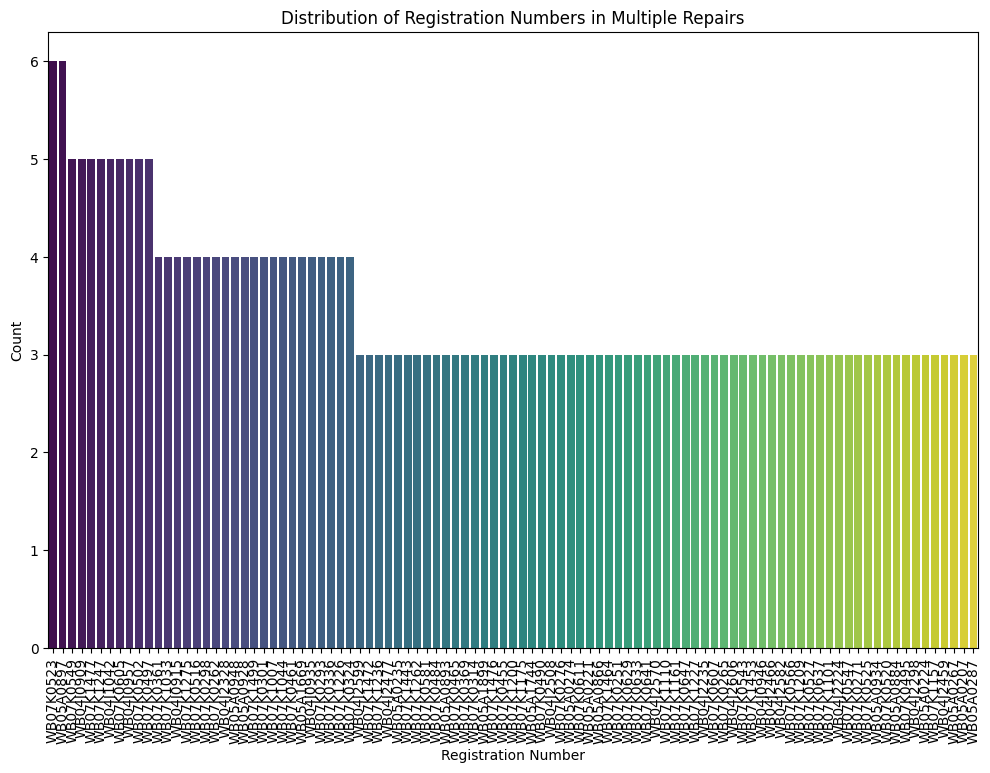

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

registration_counts = multiple_repairs['Registration Number'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=registration_counts.index, y=registration_counts.values, palette='viridis')
plt.xlabel('Registration Number')
plt.ylabel('Count')
plt.title('Distribution of Registration Numbers in Multiple Repairs')
plt.xticks(rotation=90)
plt.show()


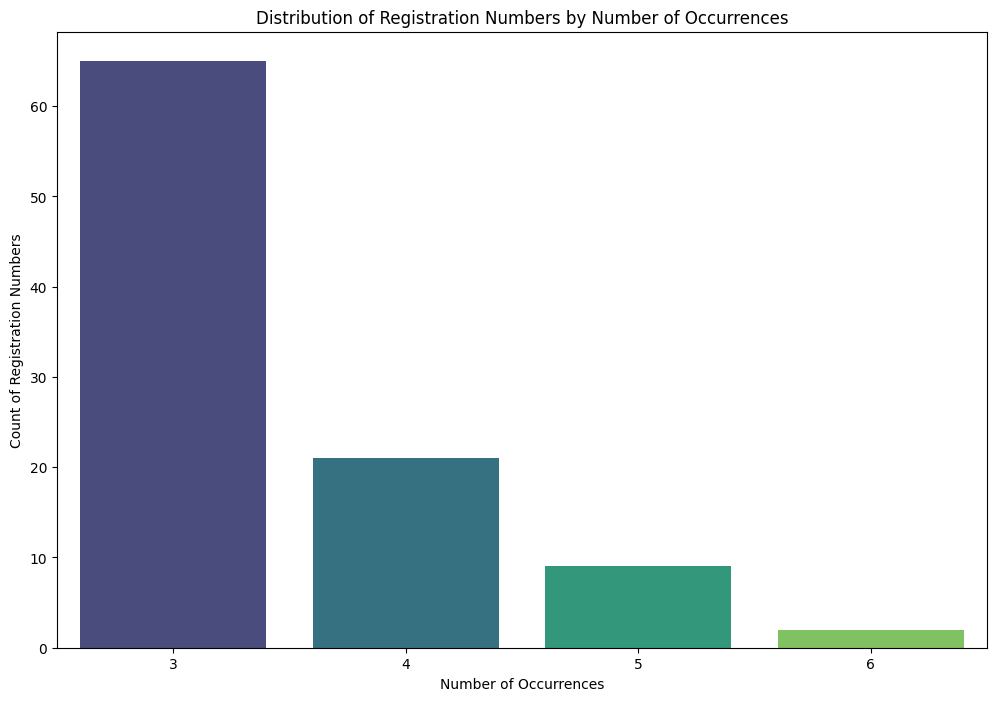

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

registration_counts = multiple_repairs['Registration Number'].value_counts()

count_of_counts = registration_counts.value_counts()

sorted_count_of_counts = count_of_counts.sort_index(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_count_of_counts.index, y=sorted_count_of_counts.values, palette='viridis')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count of Registration Numbers')
plt.title('Distribution of Registration Numbers by Number of Occurrences')
plt.show()


In [ ]:
multiple_repairs['Service Vendors'].unique()

array(['TC Motors Foreshore Road', 'Dulichand', 'Celica Motorcorp',
       'Rangeview Motors ', 'Automovill', 'TC Motors Rajarhat ',
       'Satyam Automobile', nan, 'swift wrench car service', 'KB Motors'],
      dtype=object)

In [ ]:
multiple_repairs.groupby('Registration Number')

In [ ]:
unique_vendors_per_vehicle = multiple_repairs.groupby('Registration Number')['Service Vendors'].nunique()
print(unique_vendors_per_vehicle)

Registration Number
WB04J0909    3
WB04J0915    3
WB04J0935    3
WB04J0946    2
WB04J0957    2
            ..
WB07K1464    2
WB07K1472    1
WB07K1476    2
WB07K1477    1
WB07K1499    1
Name: Service Vendors, Length: 97, dtype: int64


In [ ]:
unique_vendors_per_vehicle.mean()

1.7010309278350515

In [ ]:
multiple_repairs[multiple_repairs['Registration Number']=='WB04J0909']['Service Type']

143                    Other
160    Air Conditioner Issue
560    Air Conditioner Issue
747    Air Conditioner Issue
774    Air Conditioner Issue
Name: Service Type, dtype: object

5 repair - 5 ac

In [ ]:
multiple_repairs[multiple_repairs['Registration Number']=='WB04J0909']

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,actual,Classified Issues,Merged Service Type
143,144,WB04J0909,02-03-2023,14,Xpres-T Ziptron,O2,16-03-2024,16-03-2024,Mar-24,380,...,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,Mar-24,wip. today,53919.0,Running,recLXtxqL3IAag78D,Other,Air Conditioner Issue,Air Conditioner Issue
160,161,WB04J0909,02-03-2023,14,Xpres-T Ziptron,O2,19-03-2024,19-03-2024,Mar-24,383,...,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,Mar-24,Arrived,63818.0,Running,recC1R9JChHSTtlD6,Air Conditioner Issue,Unknown,Air Conditioner Issue
560,561,WB04J0909,02-03-2023,14,Xpres-T Ziptron,O2,24-04-2024,27-04-2024,Apr-24,419,...,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,Apr-24,cooling coil change. tomow sumit. today,71304.0,Running,recbqnPVJvuyBN0MD,Air Conditioner Issue,Unknown,Air Conditioner Issue
747,748,WB04J0909,02-03-2023,14,Xpres-T Ziptron,O2,10-05-2024,10-05-2024,May-24,435,...,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,May-24,NaN,NaN,Running,recqWPcqfeviMnFYa,Air Conditioner Issue,Unknown,Air Conditioner Issue
774,775,WB04J0909,02-03-2023,14,Xpres-T Ziptron,O2,12-05-2024,13-05-2024,May-24,437,...,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,May-24,ASIIT DA,NaN,Running,recpol6KIw44gSUbo,Air Conditioner Issue,Unknown,Air Conditioner Issue


In [ ]:
multiple_repairs['Model'].value_counts()

Model
Xpres-T Ziptron    173
Xpres-T Electra    142
eC3                 21
Name: count, dtype: int64

In [ ]:

issue_counts = multiple_repairs.pivot_table(index='Registration Number', columns='Merged Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

issue_counts_list = []

for reg_num, issues in issue_counts_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

for entry in issue_counts_list:
    print(entry)



WB04J0909: AC Charging Issue: 0, Air Conditioner Issue: 5, Air Conditioner Issue, L Mode: 0, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Overheating Issue: 0, Periodic Service: 0, Third Free Service: 0, Underbody Noise: 0, Underbody Noise, Air Conditioner Issue: 0, Underbody Noise, Air Conditioner Issue, L Mode: 0, Unknown: 0
WB04J0915: AC Charging Issue: 0, Air Conditioner Issue: 3, Air Conditioner Issue, L Mode: 0, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Overheating Issue: 0, Periodic Service: 0, Third Free Service: 0, Underbody Noise: 0, Underbody Noise, Air Conditioner Issue: 0, Underbody Noise, Air Conditioner Issue, L Mode: 0, Unknown: 0
WB04J0935: AC Charging Issue: 0, Air Conditioner Issue: 3, Air Conditioner Issue, L Mode: 0, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Overheating Issue: 0, Periodic Service: 0, Third Free Service: 0, Underbody Noise: 0, Underbody Noise, Air Conditioner Issue: 0, Underbody Noise, Air Conditioner Issue, L 

In [ ]:
issue_counts_dict

{'WB04J0909': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 5,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 0,
  'Overheating Issue': 0,
  'Periodic Service': 0,
  'Third Free Service': 0,
  'Underbody Noise': 0,
  'Underbody Noise, Air Conditioner Issue': 0,
  'Underbody Noise, Air Conditioner Issue, L Mode': 0,
  'Unknown': 0},
 'WB04J0915': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 3,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 1,
  'Overheating Issue': 0,
  'Periodic Service': 0,
  'Third Free Service': 0,
  'Underbody Noise': 0,
  'Underbody Noise, Air Conditioner Issue': 0,
  'Underbody Noise, Air Conditioner Issue, L Mode': 0,
  'Unknown': 0},
 'WB04J0935': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 3,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 0,
  'Overheating Issue': 0,
  'Peri

In [ ]:
issue_counts_dict

{'WB04J0909': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 5,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 0,
  'Overheating Issue': 0,
  'Periodic Service': 0,
  'Third Free Service': 0,
  'Underbody Noise': 0,
  'Underbody Noise, Air Conditioner Issue': 0,
  'Underbody Noise, Air Conditioner Issue, L Mode': 0,
  'Unknown': 0},
 'WB04J0915': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 3,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 1,
  'Overheating Issue': 0,
  'Periodic Service': 0,
  'Third Free Service': 0,
  'Underbody Noise': 0,
  'Underbody Noise, Air Conditioner Issue': 0,
  'Underbody Noise, Air Conditioner Issue, L Mode': 0,
  'Unknown': 0},
 'WB04J0935': {'AC Charging Issue': 0,
  'Air Conditioner Issue': 3,
  'Air Conditioner Issue, L Mode': 0,
  'DC Charging Issue': 0,
  'First Free Service': 0,
  'L Mode': 0,
  'Overheating Issue': 0,
  'Peri

In [ ]:

processed_dict = {}

for reg_num, issues in issue_counts_dict.items():
    # Filter out keys with values of 0
    filtered_issues = {k: v for k, v in issues.items() if v != 0}
    # Calculate the total of non-zero values
    total = sum(filtered_issues.values())
    # Add the total to the dictionary
    filtered_issues['Total'] = total
    # Store the processed dictionary
    processed_dict[reg_num] = filtered_issues

# Convert the processed dictionary to a list of formatted strings
issue_counts_list = []

for reg_num, issues in processed_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

# Print the resulting list
for entry in issue_counts_list:
    print(entry)


WB04J0909: Air Conditioner Issue: 5, Total: 5
WB04J0915: Air Conditioner Issue: 3, L Mode: 1, Total: 4
WB04J0935: Air Conditioner Issue: 3, Unknown: 1, Total: 4
WB04J0946: Air Conditioner Issue: 1, Unknown: 2, Total: 3
WB04J0957: Air Conditioner Issue: 1, L Mode: 2, Unknown: 2, Total: 5
WB04J1042: Air Conditioner Issue: 2, Overheating Issue: 3, Total: 5
WB04J2224: Air Conditioner Issue: 1, Underbody Noise: 1, Unknown: 1, Total: 3
WB04J2235: Periodic Service: 1, Unknown: 2, Total: 3
WB04J2298: Air Conditioner Issue: 2, Unknown: 1, Total: 3
WB04J2328: Air Conditioner Issue: 1, Unknown: 3, Total: 4
WB04J2459: Air Conditioner Issue: 3, Total: 3
WB04J2466: Air Conditioner Issue: 1, Unknown: 2, Total: 3
WB04J2477: Air Conditioner Issue: 1, Underbody Noise: 1, Unknown: 1, Total: 3
WB04J2508: Air Conditioner Issue: 3, Total: 3
WB04J2570: Underbody Noise: 2, Unknown: 1, Total: 3
WB04J2582: Underbody Noise: 2, Unknown: 1, Total: 3
WB04J2599: Overheating Issue: 2, Unknown: 1, Total: 3
WB04J2606: 

In [ ]:
issue_counts_list

['WB04J0909: Air Conditioner Issue: 5, Total: 5',
 'WB04J0915: Air Conditioner Issue: 3, L Mode: 1, Total: 4',
 'WB04J0935: Air Conditioner Issue: 3, Unknown: 1, Total: 4',
 'WB04J0946: Air Conditioner Issue: 1, Unknown: 2, Total: 3',
 'WB04J0957: Air Conditioner Issue: 1, L Mode: 2, Unknown: 2, Total: 5',
 'WB04J1042: Air Conditioner Issue: 2, Overheating Issue: 3, Total: 5',
 'WB04J2224: Air Conditioner Issue: 1, Underbody Noise: 1, Unknown: 1, Total: 3',
 'WB04J2235: Periodic Service: 1, Unknown: 2, Total: 3',
 'WB04J2298: Air Conditioner Issue: 2, Unknown: 1, Total: 3',
 'WB04J2328: Air Conditioner Issue: 1, Unknown: 3, Total: 4',
 'WB04J2459: Air Conditioner Issue: 3, Total: 3',
 'WB04J2466: Air Conditioner Issue: 1, Unknown: 2, Total: 3',
 'WB04J2477: Air Conditioner Issue: 1, Underbody Noise: 1, Unknown: 1, Total: 3',
 'WB04J2508: Air Conditioner Issue: 3, Total: 3',
 'WB04J2570: Underbody Noise: 2, Unknown: 1, Total: 3',
 'WB04J2582: Underbody Noise: 2, Unknown: 1, Total: 3',
 

In [ ]:
with open('issue_counts_list.txt', 'w') as file:
    for item in issue_counts_list:
        file.write(f"{item}\n")

print("Data has been written to issue_counts_list.txt")

Data has been written to issue_counts_list.txt
